# **Assignment 1**

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers.experimental import preprocessing

## Exercise 1

### 1(a) Import Files

In [2]:
train = np.loadtxt('train.txt',dtype="float32")
test = np.loadtxt('test.txt',dtype="float32")

def split_data(data):
    return data[0], data[1]

xtrain, ytrain = split_data(train)
xtest, ytest = split_data(test)

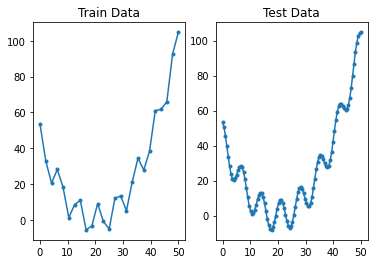

<Figure size 432x288 with 0 Axes>

In [3]:
fmt_style = '.-'
x_axis = list(range(0,60,10))

ax_1 = plt.subplot(1,2,1)
plt.plot(xtrain, ytrain,fmt_style)
plt.xticks(x_axis,[str(label) for label in x_axis])

ax_2 = plt.subplot(1,2,2)
plt.plot(xtest, ytest,fmt_style)
plt.xticks(x_axis,[str(label) for label in x_axis])

ax_1.set_title('Train Data')
ax_2.set_title('Test Data')

plt.show()
plt.savefig('./training_images/qn1a.png')

### **1(b) Building the NN**

In [4]:
# define a model architecture and compile
# We use a 2 hidden layer model 
model = keras.Sequential([
      layers.Dense(units=5, input_shape=[1]),
      layers.Dense(units=20),
      layers.Dense(units=5),
      layers.Dense(units=1) # output a value
  ])


A too complex network architecture can result in the model being overfit to the problem, and thus perform poorly on the test data evaluation

### 1(c) Optimiser
The goal of an optimizer is to minimise the losses incurred during training.

++Stochastic Gradient Descent &  Steepest Descent++

**Differences**
SGD : Samples a random point at each iteration of gradient calculation
Steepest descent : Samples entire dataset to calculate gradient

**Similiarities**
Needs to have a smooth function.

In [5]:
sgd_optimizer = optimizers.SGD(learning_rate=0.001) # init SGD optimizer 
model.compile(optimizer=sgd_optimizer,
             loss='mean_absolute_error') # compile model with L1 loss

### 1(d) Prediction of untrained model

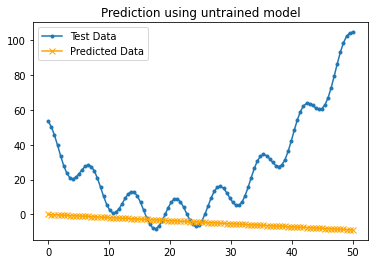

In [6]:
# test model
y_predict = model.predict(xtest)

# plot predicted with test
ax = plt.subplot() 
plt.plot(xtest, ytest,fmt_style, label='Test Data')
plt.plot(xtest, y_predict,color='orange',marker='x',label='Predicted Data')
plt.legend()
ax.set_title('Prediction using untrained model')
plt.show()

model.save_weights('./checkpoints/untrained_no_activation')


This is because the model is not trained and would just use the unintialised weights to output a prediction

### 1(e) Model Training

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(xtrain,ytrain, epochs=1000, verbose=0, validation_split=0.3) # model training
model.save_weights('./checkpoints/trained_no_activation')


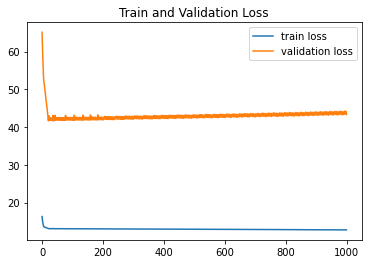

In [9]:
ax = plt.subplot()
plt.plot(history.epoch, history.history['loss'],label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation loss')
ax.set_title('Train and Validation Loss')
ax.legend()
plt.show()

When the gap between the train and validation loss is very close, the model is of high quality.

### 1(f) Comparing trained and untrained model

In [10]:
y_new_predict = model.predict(xtest)

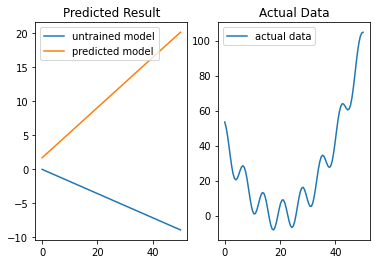

In [11]:
fig, axs = plt.subplots(1,2)
axs[0].plot(xtest, y_predict, label = 'untrained model')
axs[0].plot(xtest, y_new_predict, label = 'predicted model')
axs[0].legend()
axs[0].set_title('Predicted Result')

axs[1].plot(xtest, ytest, label = 'actual data')
axs[1].legend()
axs[1].set_title('Actual Data')

plt.show()

The network did not approximate even the rough shape as the fully connected network is a linear model and the input data is non linear.

## Exercise 2

### 2(a) Build ReLU function

In [12]:
def relu_activation(x):
    return tf.math.maximum(0.0,x)

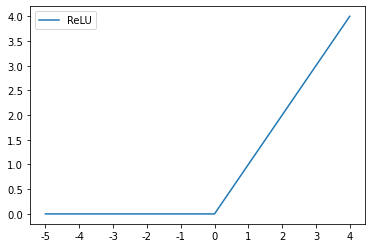

In [13]:
# plot activation function
plt.plot(list(range(-5,5)),relu_activation(list(range(-5,5))), label='ReLU')
plt.xticks(list(range(-5,5)),[str(label) for label in list(range(-5,5))])
plt.legend()
plt.show()

In [25]:
relu_model = keras.Sequential([
      layers.Dense(units=5, input_shape=[1], activation=relu_activation),
      layers.Dense(units=20, activation=relu_activation),
      layers.Dense(units=5, activation=relu_activation),
      layers.Dense(units=1) # output a value
  ])

### 2(b) Different Optimiser

Use Adagrad

In [36]:
adam_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0001)

relu_model.compile(optimizer=adam_optimizer,
             loss='mean_absolute_error') # compile model with L1 loss


### 2(c) Use Untrained model to predict

In [37]:
relu_model.save_weights('./checkpoints/untrained_relu')
relu_predict_untrained = relu_model.predict(xtest)

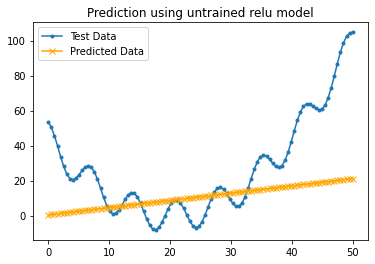

In [38]:
ax = plt.subplot() 
plt.plot(xtest, ytest,fmt_style, label='Test Data')
plt.plot(xtest, relu_predict_untrained,color='orange',marker='x',label='Predicted Data')
plt.legend()
ax.set_title('Prediction using untrained relu model')
plt.show()

### 2(d) Train the model and predict

In [39]:
relu_history = relu_model.fit(xtrain,ytrain, epochs=1000, verbose=0, validation_split=0.3) # model training
relu_model.save_weights('./checkpoints/trained_relu')

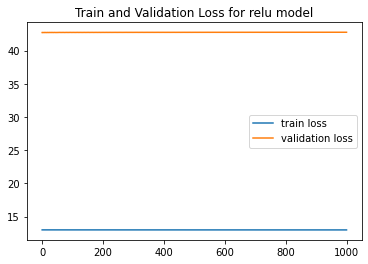

In [40]:
ax = plt.subplot()
plt.plot(relu_history.epoch, relu_history.history['loss'],label='train loss')
plt.plot(relu_history.epoch, relu_history.history['val_loss'], label='validation loss')
ax.set_title('Train and Validation Loss for relu model')
ax.legend()
plt.show()

### 2(e) Comparing predictions using relu & in exercise 1

In [41]:
relu_predict_trained = relu_model.predict(xtest)

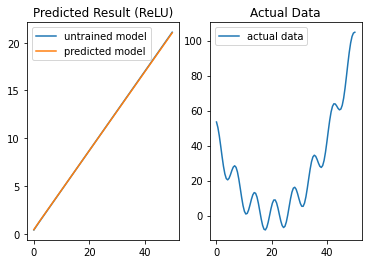

In [42]:
fig, axs = plt.subplots(1,2)
axs[0].plot(xtest, relu_predict_untrained, label = 'untrained model')
axs[0].plot(xtest, relu_predict_trained, label = 'predicted model')
axs[0].legend()
axs[0].set_title('Predicted Result (ReLU)')

axs[1].plot(xtest, ytest, label = 'actual data')
axs[1].legend()
axs[1].set_title('Actual Data')

plt.show()


## Exercise 3
### 3(a) Custom Callbacks

In [33]:
plot_loss_interval = 100

class PlotLossCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.logs = {
            'loss' : [],
            'val_loss' : [],
            'epoch' : []
        }
    def on_epoch_end(self, epoch, logs=None):
        self.logs['loss'].append(logs['loss'])
        self.logs['val_loss'].append(logs['val_loss'])
        self.logs['epoch'].append(epoch)
        
        if not epoch % plot_loss_interval and epoch !=0:
            ax = plt.subplot()
            plt.plot(self.logs['epoch'], self.logs['loss'],label='train loss')
            plt.plot(self.logs['epoch'], self.logs['val_loss'], label='validation loss')
            ax.set_title(f'Train and Validation Loss for relu model at epoch {epoch}')
            ax.legend()
            plt.savefig(f'./training_images/losses_at_epoch_{epoch}')
            plt.close()

In [34]:
relu_history = relu_model.fit(xtrain,ytrain, epochs=1000, verbose=0, validation_split=0.3, callbacks=[PlotLossCallback()]) # model training